In [2]:
import argparse
import os
import numpy as np
import pandas as pd
import nltk
import re
from gensim.models import Word2Vec
import gensim
from gensim.models.callbacks import CallbackAny2Vec
from gensim.test.utils import common_texts, get_tmpfile

C:\Users\Public\Documents\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [3]:
# ************************************************************
#     *******  Model Training Code starts here ********
# ************************************************************


loss_list=[0]
class callback(CallbackAny2Vec):
    '''Callback to print loss after each epoch.'''

    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        print('Loss after epoch {}: {}'.format(self.epoch, loss))
        
        print(loss-loss_list[-1])
        loss_list.append(loss)
        
        self.epoch += 1

    
filepath = os.path.join(data_folder, 'training_preprocessed_1.csv')
df=pd.read_csv(filepath, encoding = "ISO-8859-1")


all_words=[]
for sent in df["Tweet"]:
    all_words.append(nltk.word_tokenize(sent))

word2vec = Word2Vec(all_words, workers=7 , min_count=30, size=300, sg=0,
                    compute_loss=True, callbacks=[callback()], iter=5)


print('Running the test dataset through...')



#     *******  Model Training Code end here ********

NameError: name 'data_folder' is not defined

https://www.kaggle.com/marijakekic/cnn-in-keras-with-pretrained-word2vec-weights

In [4]:
import numpy as np
import pandas as pd

In [22]:
# training data
train_data = pd.read_csv(r"C:/Users/buvan/Downloads/stance-data-all-annotations/data-all-annotations/trainingdata-all-annotations.txt", sep='\\t', header=0)

# test data
test_data = pd.read_csv(r"C:/Users/buvan/Downloads/stance-data-all-annotations/data-all-annotations/testdata-taskB-all-annotations.txt", sep='\\t', header=0)

C:\Users\Public\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\Public\Documents\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [23]:
train_data.head(3)

,ID,Target,Tweet,Stance,Opinion towards,Sentiment
0,101,Atheism,dear lord thank u for all of ur blessings forg...,AGAINST,OTHER,POSITIVE
1,102,Atheism,"Blessed are the peacemakers, for they shall be...",AGAINST,OTHER,POSITIVE
2,103,Atheism,I am not conformed to this world. I am transfo...,AGAINST,OTHER,POSITIVE


In [24]:
test_data.head(3)

,ID,Target,Tweet,Stance,Opinion towards,Sentiment
0,20001,Donald Trump,@2014voteblue @ChrisJZullo blindly supporting ...,NONE,OTHER,NEGATIVE
1,20002,Donald Trump,@ThePimpernelX @Cameron_Gray @CalebHowe Total...,NONE,OTHER,POSITIVE
2,20003,Donald Trump,@JeffYoung @ThePatriot143 I fully support full...,NONE,OTHER,POSITIVE


In [25]:
print(train_data.shape,test_data.shape)
print(train_data.isnull().sum())
print(test_data.isnull().sum())

(2814, 6) (707, 6)
ID                 0
Target             0
Tweet              0
Stance             0
Opinion towards    0
Sentiment          0
dtype: int64
ID                 0
Target             0
Tweet              0
Stance             0
Opinion towards    0
Sentiment          0
dtype: int64


In [81]:
authors=train_data.Sentiment.unique()
dic={}
for i,senti in enumerate(authors):
    dic[senti]=i
labels=train_data.Sentiment.apply(lambda x:dic[x])
dic

{'POSITIVE': 0, 'NEGATIVE': 1, 'NEITHER': 2}

In [27]:
val_data=train_data.sample(frac=0.2,random_state=250)
train_data=train_data.drop(val_data.index)
train_data

,ID,Target,Tweet,Stance,Opinion towards,Sentiment
0,101,Atheism,dear lord thank u for all of ur blessings forg...,AGAINST,OTHER,POSITIVE
1,102,Atheism,"Blessed are the peacemakers, for they shall be...",AGAINST,OTHER,POSITIVE
2,103,Atheism,I am not conformed to this world. I am transfo...,AGAINST,OTHER,POSITIVE
3,104,Atheism,Salah should be prayed with #focus and #unders...,AGAINST,OTHER,POSITIVE
4,105,Atheism,And stay in your houses and do not display you...,AGAINST,OTHER,NEGATIVE
...,...,...,...,...,...,...
2807,2908,Legalization of Abortion,If your agonist abortion get a vasectomy #SemST,AGAINST,OTHER,NEGATIVE
2808,2909,Legalization of Abortion,When you bring up the 50 million black babies ...,AGAINST,OTHER,NEGATIVE
2809,2910,Legalization of Abortion,"There's a law protecting unborn eagles, but no...",AGAINST,TARGET,NEGATIVE
2812,2913,Legalization of Abortion,"Equal rights for those 'born that way', no rig...",AGAINST,OTHER,NEGATIVE


In [28]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [29]:
texts=train_data["Tweet"]
texts

0       dear lord thank u for all of ur blessings forg...
1       Blessed are the peacemakers, for they shall be...
2       I am not conformed to this world. I am transfo...
3       Salah should be prayed with #focus and #unders...
4       And stay in your houses and do not display you...
                              ...                        
2807     If your agonist abortion get a vasectomy  #SemST
2808    When you bring up the 50 million black babies ...
2809    There's a law protecting unborn eagles, but no...
2812    Equal rights for those 'born that way', no rig...
2813    #POTUS seals his legacy w/ 1/2 doz wins. The #...
Name: Tweet, Length: 2251, dtype: object

In [30]:
NUM_WORDS=200000
tokenizer = Tokenizer(num_words=NUM_WORDS,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n\'',
                      lower=True)
tokenizer.fit_on_texts(texts)
sequences_train = tokenizer.texts_to_sequences(texts)
sequences_valid=tokenizer.texts_to_sequences(val_data["Tweet"])
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print(sequences_train[1])

Found 7844 unique tokens.
[495, 18, 2, 2745, 11, 33, 452, 15, 332, 135, 6, 29, 1245, 361, 496, 2746, 190, 1]


In [31]:
labels[train_data.index]

0       0
1       0
2       0
3       0
4       1
       ..
2807    1
2808    1
2809    1
2812    1
2813    1
Name: Sentiment, Length: 2251, dtype: int64

In [32]:
X_train = pad_sequences(sequences_train)
X_val = pad_sequences(sequences_valid,maxlen=X_train.shape[1])
y_train = to_categorical(np.asarray(labels[train_data.index]))
y_val = to_categorical(np.asarray(labels[val_data.index]))
print('Shape of X train and X validation tensor:', X_train.shape,X_val.shape)
print('Shape of label train and validation tensor:', y_train.shape,y_val.shape)
X_train[1]

Shape of X train and X validation tensor: (2251, 33) (563, 33)
Shape of label train and validation tensor: (2251, 3) (563, 3)


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,  495,   18,    2, 2745,   11,   33,  452,
         15,  332,  135,    6,   29, 1245,  361,  496, 2746,  190,    1])

In [33]:
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

from gensim.models.keyedvectors import KeyedVectors

word_vectors = KeyedVectors.load_word2vec_format('w2v_model_NLP_week1.pkl')

EMBEDDING_DIM=300
vocabulary_size=min(len(word_index)+1,NUM_WORDS)
embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        embedding_vector = word_vectors[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)

del(word_vectors)

from keras.layers import Embedding
embedding_layer = Embedding(vocabulary_size,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            trainable=True)


In [35]:
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPooling2D, Dropout,concatenate
from keras.layers.core import Reshape, Flatten
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import Model
from keras import regularizers

from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D


sequence_length = X_train.shape[1]
filter_sizes = [3,4,5]
num_filters = 600
drop = 0.5


embed_dim = 128
lstm_out = 196

inputs = Input(shape=(sequence_length,))
embedding = embedding_layer(inputs)
# model.add(embedding_layer)
reshape = Reshape((sequence_length,EMBEDDING_DIM,1))(embedding)

conv_0 = Conv2D(num_filters, (filter_sizes[0], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_1 = Conv2D(num_filters, (filter_sizes[1], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)
conv_2 = Conv2D(num_filters, (filter_sizes[2], EMBEDDING_DIM),activation='relu',kernel_regularizer=regularizers.l2(0.01))(reshape)

maxpool_0 = MaxPooling2D((sequence_length - filter_sizes[0] + 1, 1), strides=(1,1))(conv_0)
maxpool_1 = MaxPooling2D((sequence_length - filter_sizes[1] + 1, 1), strides=(1,1))(conv_1)
maxpool_2 = MaxPooling2D((sequence_length - filter_sizes[2] + 1, 1), strides=(1,1))(conv_2)

merged_tensor = concatenate([maxpool_0, maxpool_1, maxpool_2], axis=1)
flatten = Flatten()(merged_tensor)
reshape = Reshape((3*num_filters,))(flatten)
dropout = Dropout(drop)(flatten)



# dropout = SpatialDropout1D(0.4)(dropout)
# lstm = LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2)(dropout)
# dense = Dense(3, activation = 'softmax')(lstm)
# # model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

output = Dense(units=3, activation='softmax',kernel_regularizer=regularizers.l2(0.01))(dropout)

# this creates a model that includes
model = Model(inputs, output)




In [42]:
adam = Adam(lr=1e-3)

model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['acc'])
callbacks = [EarlyStopping(monitor='val_loss')]
history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_val, y_val),
         callbacks=callbacks)  
# starts training

Epoch 1/5
71/71 [==============================] - 14s 200ms/step - loss: 0.4321 - acc: 0.9849 - val_loss: 1.2500 - val_acc: 0.7140
Epoch 2/5
71/71 [==============================] - 14s 193ms/step - loss: 0.3994 - acc: 0.9911 - val_loss: 1.0800 - val_acc: 0.7052
Epoch 3/5
71/71 [==============================] - 14s 192ms/step - loss: 0.3133 - acc: 0.9951 - val_loss: 1.0991 - val_acc: 0.7123


In [43]:
sequences_test=tokenizer.texts_to_sequences(test_data["Tweet"])
X_test = pad_sequences(sequences_test,maxlen=X_train.shape[1])
y_pred = model.predict(X_test)

In [44]:
to_submit=pd.DataFrame(index=test_data.ID,data={'POSITIVE':y_pred[:,dic['POSITIVE']],
                                                'NEGATIVE':y_pred[:,dic['NEGATIVE']]})

In [45]:
to_submit.to_csv('submit.csv')

In [108]:
import matplotlib.pyplot as plt

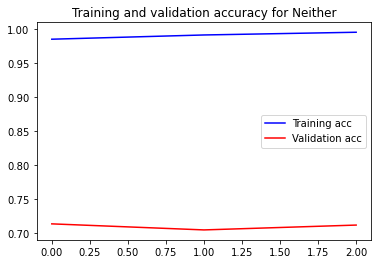

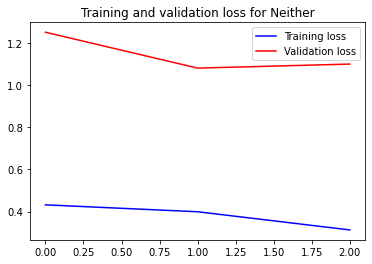

In [162]:
epochs = range(3)
acc = history.history['acc']

val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
label = ["Positive", "Negative", "Neither"]


plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy for ' + label[i])
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss for ' + label[i])
plt.legend()
plt.show()

In [93]:
def predict(text, include_neutral=True):
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=X_train.shape[1])
    
    # Predict
    score = model.predict(x_test)
    print(score)
    
    print("0: Positive, 1:Negative, 2: Neither")

#     if(score <= 0.4):
#         label = "Negative"
#     if(score >= 0.6):
#         label = "Positive"
#     else:
#         label = "Neutral"

    return 0

In [155]:
text = "We are up big now but they are trying to steal the election. We will never let them do it.Votes cannot be cast after the polls are closed."
pred = predict(text)


[[0.02365948 0.8574029  0.11893766]]
0: Positive, 1:Negative, 2: Neither


In [154]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = model.predict(X_val)
y_pred = np.argmax(y_pred1, axis=1)#
y_vali = np.argmax(y_val, axis=1)
# print(y_pred)
# print(y_vali)
# Print f1, precision, and recall scores
print(precision_score(y_vali, y_pred , average="weighted"))
print(recall_score(y_vali, y_pred , average="weighted"))
print(f1_score(y_vali, y_pred , average="weighted"))

0.6858507197006719
0.7104795737122558
0.6931307424213513


# LSTM

In [150]:
embed_dim = 128
lstm_out = 196
max_features = 2000

model1 = Sequential()
model1.add(embedding_layer)
# model1.add(Embedding(max_features, embed_dim,input_length =(sequence_length,)))
model1.add(SpatialDropout1D(0.2))
model1.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model1.add(Dense(3,activation='softmax'))
model1.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model1.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        multiple                  2353500   
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, None, 300)         0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 196)               389648    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 591       
Total params: 2,743,739
Trainable params: 2,743,739
Non-trainable params: 0
_________________________________________________________________
None


In [151]:
h = model1.fit(X_train, y_train, batch_size=32, epochs=5, verbose=2, validation_data=(X_val, y_val), callbacks = callbacks)


Epoch 1/5
71/71 - 10s - loss: 0.1986 - accuracy: 0.9258 - val_loss: 1.1500 - val_accuracy: 0.6927
Epoch 2/5
71/71 - 9s - loss: 0.0247 - accuracy: 0.9933 - val_loss: 1.2853 - val_accuracy: 0.7105


In [152]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred12 = model1.predict(X_val)
y_pred2 = np.argmax(y_pred12, axis=1)
# y_vali = np.argmax(y_val, axis=1)
# print(y_pred)
# print(y_vali)
# Print f1, precision, and recall scores
print(precision_score(y_vali, y_pred2 , average="weighted"))
print(recall_score(y_vali, y_pred2 , average="weighted"))
print(f1_score(y_vali, y_pred2 , average="weighted"))

0.6960719976705767
0.7104795737122558
0.702098844129776


In [156]:
def predict1(text, include_neutral=True):
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=X_train.shape[1])
    
    # Predict
    score = model1.predict(x_test)
    print(score)
    
    print("0: Positive, 1:Negative, 2: Neither")

#     if(score <= 0.4):
#         label = "Negative"
#     if(score >= 0.6):
#         label = "Positive"
#     else:
#         label = "Neutral"

    return 0

In [158]:
text = "We are up big now but they are trying to steal the election. We will never let them do it.Votes cannot be cast after the polls are closed."
pred = predict1(text)

[[0.00183636 0.9956787  0.00248501]]
0: Positive, 1:Negative, 2: Neither


In [166]:
text = "I really have good people in my life right now! you only live once"
pred = predict1(text)

[[0.91191804 0.05057024 0.03751175]]
0: Positive, 1:Negative, 2: Neither


In [173]:
text = "this group of people have not done anything for the country"
pred = predict1(text)

[[0.42450395 0.17547758 0.40001854]]
0: Positive, 1:Negative, 2: Neither
